# 眞田担当分 第3回宿題 回答例

## 宿題: SQL

1. ワランティテーブルにおいて、W_PROD_MODEL_CD, W_CAUSAL_PART_NO, W_DIST_CDのコードの種類を表示してください
2. ワランティテーブルにおいて、W_PROD_MODEL_CDで層別したときの、平均,最大,最小のW_FC_TO_FAILUREを表示してください
3. 生産テーブルにおいて、V_PROD_MODEL_CDで層別し、V_FCOK順に並べたときの、累積生産台数を表示してください。

In [2]:
from sqlalchemy import create_engine
from contextlib import closing
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 1000)

In [3]:
# このnotebookと同じフォルダに.sqlite3ファイルが置いてある場合
PATH_DB = "skill_transfer.sqlite3" 

# 絶対パスでも指定できる
# /Users/Sanada/Documents/Projects/Suzuki/notebooks/skill_transfer.sqlite3
# 相対パスでも指定できる
# ../data/skill_transfer.sqlite3

In [4]:
def call_query(query:str):
    engine = create_engine("sqlite:///skill_transfer.sqlite3")
    res = pd.read_sql(query, engine)
    engine.dispose()
    return res

1. ワランティテーブルにおいて、W_PROD_MODEL_CD, W_CAUSAL_PART_NO, W_DIST_CDのコードの種類を表示してください

In [4]:
# W_PROD_MODEL_CD
sql = """
    select distinct(W_PROD_MODEL_CD)
    from dbhaa;
"""
call_query(sql)

,W_PROD_MODEL_CD
0,YV0E1B9J
1,YG0B1B9D
2,YG0A2B9D
3,YT212B9F
4,YV052B98
5,YK811CVE
6,YV051BVJ
7,YV7A1H79
8,YH626BCC
9,YN1G1B9R


In [5]:
# W_CAUSAL_PART_CD
sql = """
    select distinct(W_CAUSAL_PART_NO)
    from dbhaa;
"""
call_query(sql)

,W_CAUSAL_PART_NO
0,72350-72M02
1,17931-58J01
2,38340-50M00
3,43252-63J10-0PG
4,14281-68K00
5,28150-64P30-ZML
6,36260-67H02
7,14281-80J00
8,09180-08227
9,74140-82K11


In [6]:
# W_DIST_CD
sql = """
    select distinct(W_DIST_CD)
    from dbhaa;
"""
call_query(sql)

,W_DIST_CD
0,40223
1,50224
2,31601
3,40403
4,50301
5,51609
6,30903
7,60205
8,20513
9,60404


In [7]:
# 例えば以下のようにすれば、大データでもpythonからSQLで種類を抽出する関数がかける
def pickup_uniques(col_name):
    sql = """
    select distinct({})
    from dbhaa;
""".format(col_name)
    return call_query(sql)

In [8]:
pickup_uniques("W_PROD_DIV")

,W_PROD_DIV
0,B


2. ワランティテーブルにおいて、W_PROD_MODEL_CDで層別したときの、平均,最大,最小のW_FC_TO_FAILUREを表示してください

In [6]:
sql = """
    select
        avg(W_FC_TO_FAILURE) as avg_t
        ,max(W_FC_TO_FAILURE) as max_t
        ,min(W_FC_TO_FAILURE) as min_t,
        W_PROD_MODEL_CD
    from dbhaa
    group by
    W_PROD_MODEL_CD;
"""
call_query(sql)

,avg_t,max_t,min_t,W_PROD_MODEL_CD
0,33.000000,33,33,Y1J12B9Q
1,32.000000,32,32,Y1J42B9F
2,37.000000,37,37,Y1J51B9F
3,11.000000,20,2,Y9J43
4,10.333333,13,8,YAA11
5,2.000000,2,2,YAA21
6,15.000000,15,15,YAA71
7,49.000000,49,49,YB742B9L
8,10.000000,10,10,YB7E4B96
9,36.000000,36,36,YD341B7T


In [8]:
# こちらも、関数化すると便利である。
def grouped_describe(group_col, value_col, table):
    sql = """
    select
        avg({value_col}) as avg_{value_col}
        ,max({value_col}) as max_{value_col}
        ,min({value_col}) as min_{value_col}
    from {table}
    group by
    {group_col};
""".format(value_col=value_col, group_col=group_col, table=table)
    return call_query(sql)

In [9]:
for x in []:
    grouped_describe(x, "W_FC_TO_FAILURE", "dbhaa")

,avg_W_FC_TO_FAILURE,max_W_FC_TO_FAILURE,min_W_FC_TO_FAILURE
0,33.000000,33,33
1,32.000000,32,32
2,37.000000,37,37
3,11.000000,20,2
4,10.333333,13,8
5,2.000000,2,2
6,15.000000,15,15
7,49.000000,49,49
8,10.000000,10,10
9,36.000000,36,36


3. 生産テーブルにおいて、V_PROD_MODEL_CDで層別し、V_FCOK順に並べたときの、累積生産台数を表示してください。

In [12]:
sql = """
    select
        V_PROD_MODEL_CD
        ,V_FCOK
        ,row_number() over(partition by V_PROD_MODEL_CD order by V_FCOK)
    from tbhaa;
"""
call_query(sql)

,V_PROD_MODEL_CD,V_FCOK,row_number() over(partition by V_PROD_MODEL_CD order by V_FCOK)
0,None,20190315,1
1,None,20190315,2
2,None,20190315,3
3,None,20190315,4
4,None,20190315,5
5,None,20190315,6
6,None,20190315,7
7,None,20190315,8
8,None,20190315,9
9,None,20190315,10


## その他

### 1.3 問題回答例

- Aさんは日経平均株価の予測に取り組んでいます。Aさんは同じ日にちのSP500(米国の株価指数), HSI(香港の株価指数), EUROSTOXX(EUの株価指数)を使ってその日の日経平均を予測するモデルを組んだところ、高い精度のモデルができました。このモデルには何か問題がありますか？
    - 実際の予測時点には得られないデータを使用してしまっており(リーク)、実運用ができないという問題点がある。
- Bさんはカレンダー月とカレンダー日を用いて、売上を予測するモデルを構築しましたが、あやまって月、日をカテゴリ変数として扱わず、数値として扱ってモデルを組んでしまいました。このモデルにはどのような問題がありますか？
    - 1月~12月、1日~31日の間に線形に増加/減少するような月・日の影響しかモデルに組み込むことができない。(五十日など、特定の日や月にのみ現れるような非線形の影響を組み込めない)
- 0,1の目的変数を予測するモデルを通常の線形回帰でモデリングした場合、どのような問題がありますか？
    - 0,1以外の値、すなわち現実的でない値も予測結果として出てきてしまう(負の値など)
- 全く先入観をなしにモデリングを行う場合と、あたりをつけてモデリングを行う場合、それぞれのメリット・デメリットを挙げてみましょう。
    - 先入観なし:
        - メリット: 思いもよらないような発見が得られる可能性がある。
        - デメリット: 計算量が多くなる傾向がある。ディープラーニングなど、多くのパラメータを用いるモデルは表現力は豊かであっても、最良のパラメータを推定することは困難であり、重要な特徴量が自動的には得られない可能性もある。
    - 先入観あり:
        - メリット: 小さな労力/計算量で、精度の高いモデルが作成できる可能性がある。
        - デメリット: 既存の知見を元にモデルを作成するため、新しい知見は得られにくい。

### 1.6 pandas 問題回答例

tbhaaテーブルを使用して、以下を行え
1. 各列に対して、基礎統計量を計算せよ
2. 各列の欠損の割合を示せ
3. (発展) 欠損か否かを0,1に置き換え、相関行列を計算、図示せよ
4. 名義尺度列に対して、円グラフで上位10種+その他の配分を可視化せよ
5. 月毎の件数を時系列プロットで示せ。その際に、月はV_FCOKを文字列化して最初の6桁を用いよ

In [13]:
df_tbhaa = call_query("select * from tbhaa")

In [14]:
# 1.各列に対して、基礎統計量を計算せよ
df_tbhaa.describe()

,V_BASE_CD,V_PROD_DIV,V_VIN,V_ENGINE_NO,V_MOTOR_NO,V_MISSON_NO,V_KEY_NO,V_FCOK,V_FCOK_TIME,V_ABOK,V_ABOK_TIME,V_PROD_MODEL_CD,V_SALES_MODEL_CD,V_SALES_MODEL_NM,V_SPEC,V_COLOR,V_PLANT_CD,V_DIST_CD,V_BRANCH_CD,V_SHIPPING_DATE,V_SHIPPING_FCOK,V_SHIPPING_ABOK,V_INVOICE_NO,V_SALES_NO,V_CASE_NO,V_SRC_DIV,V_CRT_TIME_STAMP
count,1572,1572,1572,1572,0.0,523,1537,1572,1571,1453,1452,572,1532,0.0,1572,1537,0.0,1538,1167,1362,3,3,340,340,340,1572,1572
unique,4,1,1572,1572,0.0,523,1251,368,1385,351,1380,165,286,0.0,32,122,0.0,158,135,164,3,3,145,149,298,1,1572
top,100100,B,MH55S-275471,R06A-K947435,NaN,90644879,50172,20190316,000000,20190316,021011,YP5C1C7J,A6B424N,NaN,000,ZVR,NaN,304520,506070,20190314,20140911,20140910,B1-10294,BMC-7376,000188,1,16-12-15 15:30:38.094017000
freq,1393,1572,1,1,NaN,1,5,512,119,454,3,53,110,NaN,1133,137,NaN,148,51,414,1,1,15,15,3,1572,1


In [15]:
# 2.各列の欠損の割合を示せ
(df_tbhaa.isna().sum() / df_tbhaa.shape[0]).sort_values(ascending=False)

V_SALES_MODEL_NM    1.000000
V_PLANT_CD          1.000000
V_MOTOR_NO          1.000000
V_SHIPPING_ABOK     0.998092
V_SHIPPING_FCOK     0.998092
V_CASE_NO           0.783715
V_SALES_NO          0.783715
V_INVOICE_NO        0.783715
V_MISSON_NO         0.667303
V_PROD_MODEL_CD     0.636132
V_BRANCH_CD         0.257634
V_SHIPPING_DATE     0.133588
V_ABOK_TIME         0.076336
V_ABOK              0.075700
V_SALES_MODEL_CD    0.025445
V_KEY_NO            0.022265
V_COLOR             0.022265
V_DIST_CD           0.021628
V_FCOK_TIME         0.000636
V_PROD_DIV          0.000000
V_VIN               0.000000
V_ENGINE_NO         0.000000
V_CRT_TIME_STAMP    0.000000
V_FCOK              0.000000
V_SRC_DIV           0.000000
V_SPEC              0.000000
V_BASE_CD           0.000000
dtype: float64

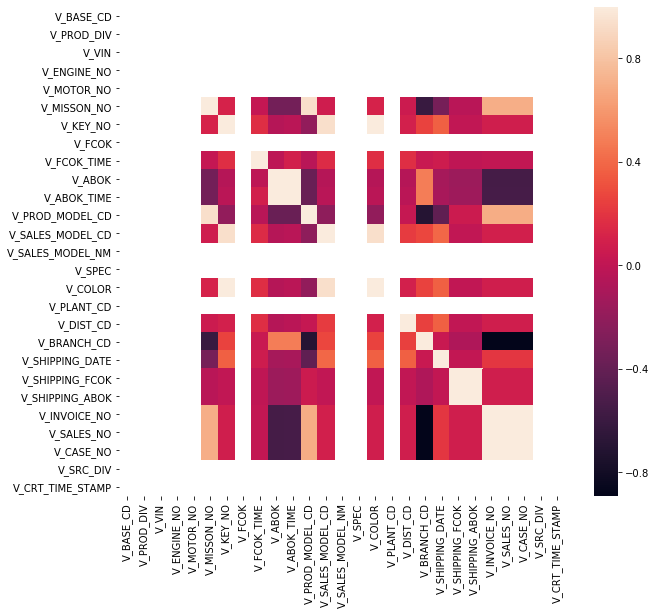

In [16]:
# 3.(発展) 欠損か否かを0,1に置き換え、相関行列を計算、図示せよ
import seaborn as sns
plt.figure(figsize=(10,9))
corr = df_tbhaa.isna().corr()
sns.heatmap(corr)

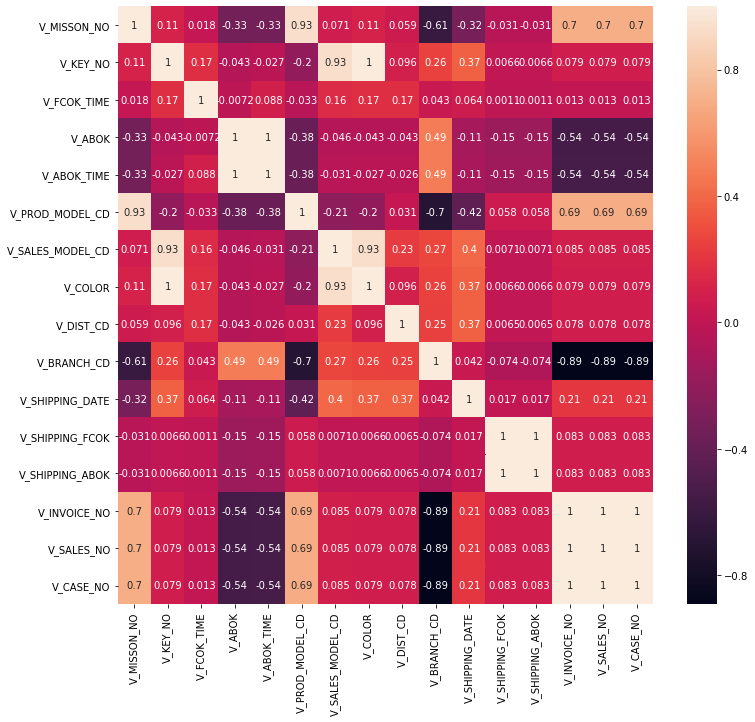

In [17]:
plt.figure(figsize=(12,11))
df_na = df_tbhaa.isna()
df_na = df_na.loc[:,df_na.nunique() != 1] # 1種類しかない列(値が不変の列)を除くと多少グラフがすっきりする
corr = df_na.corr()
sns.heatmap(corr, annot=True) # annot=Trueとすると、数値のアノテーションがつけられる

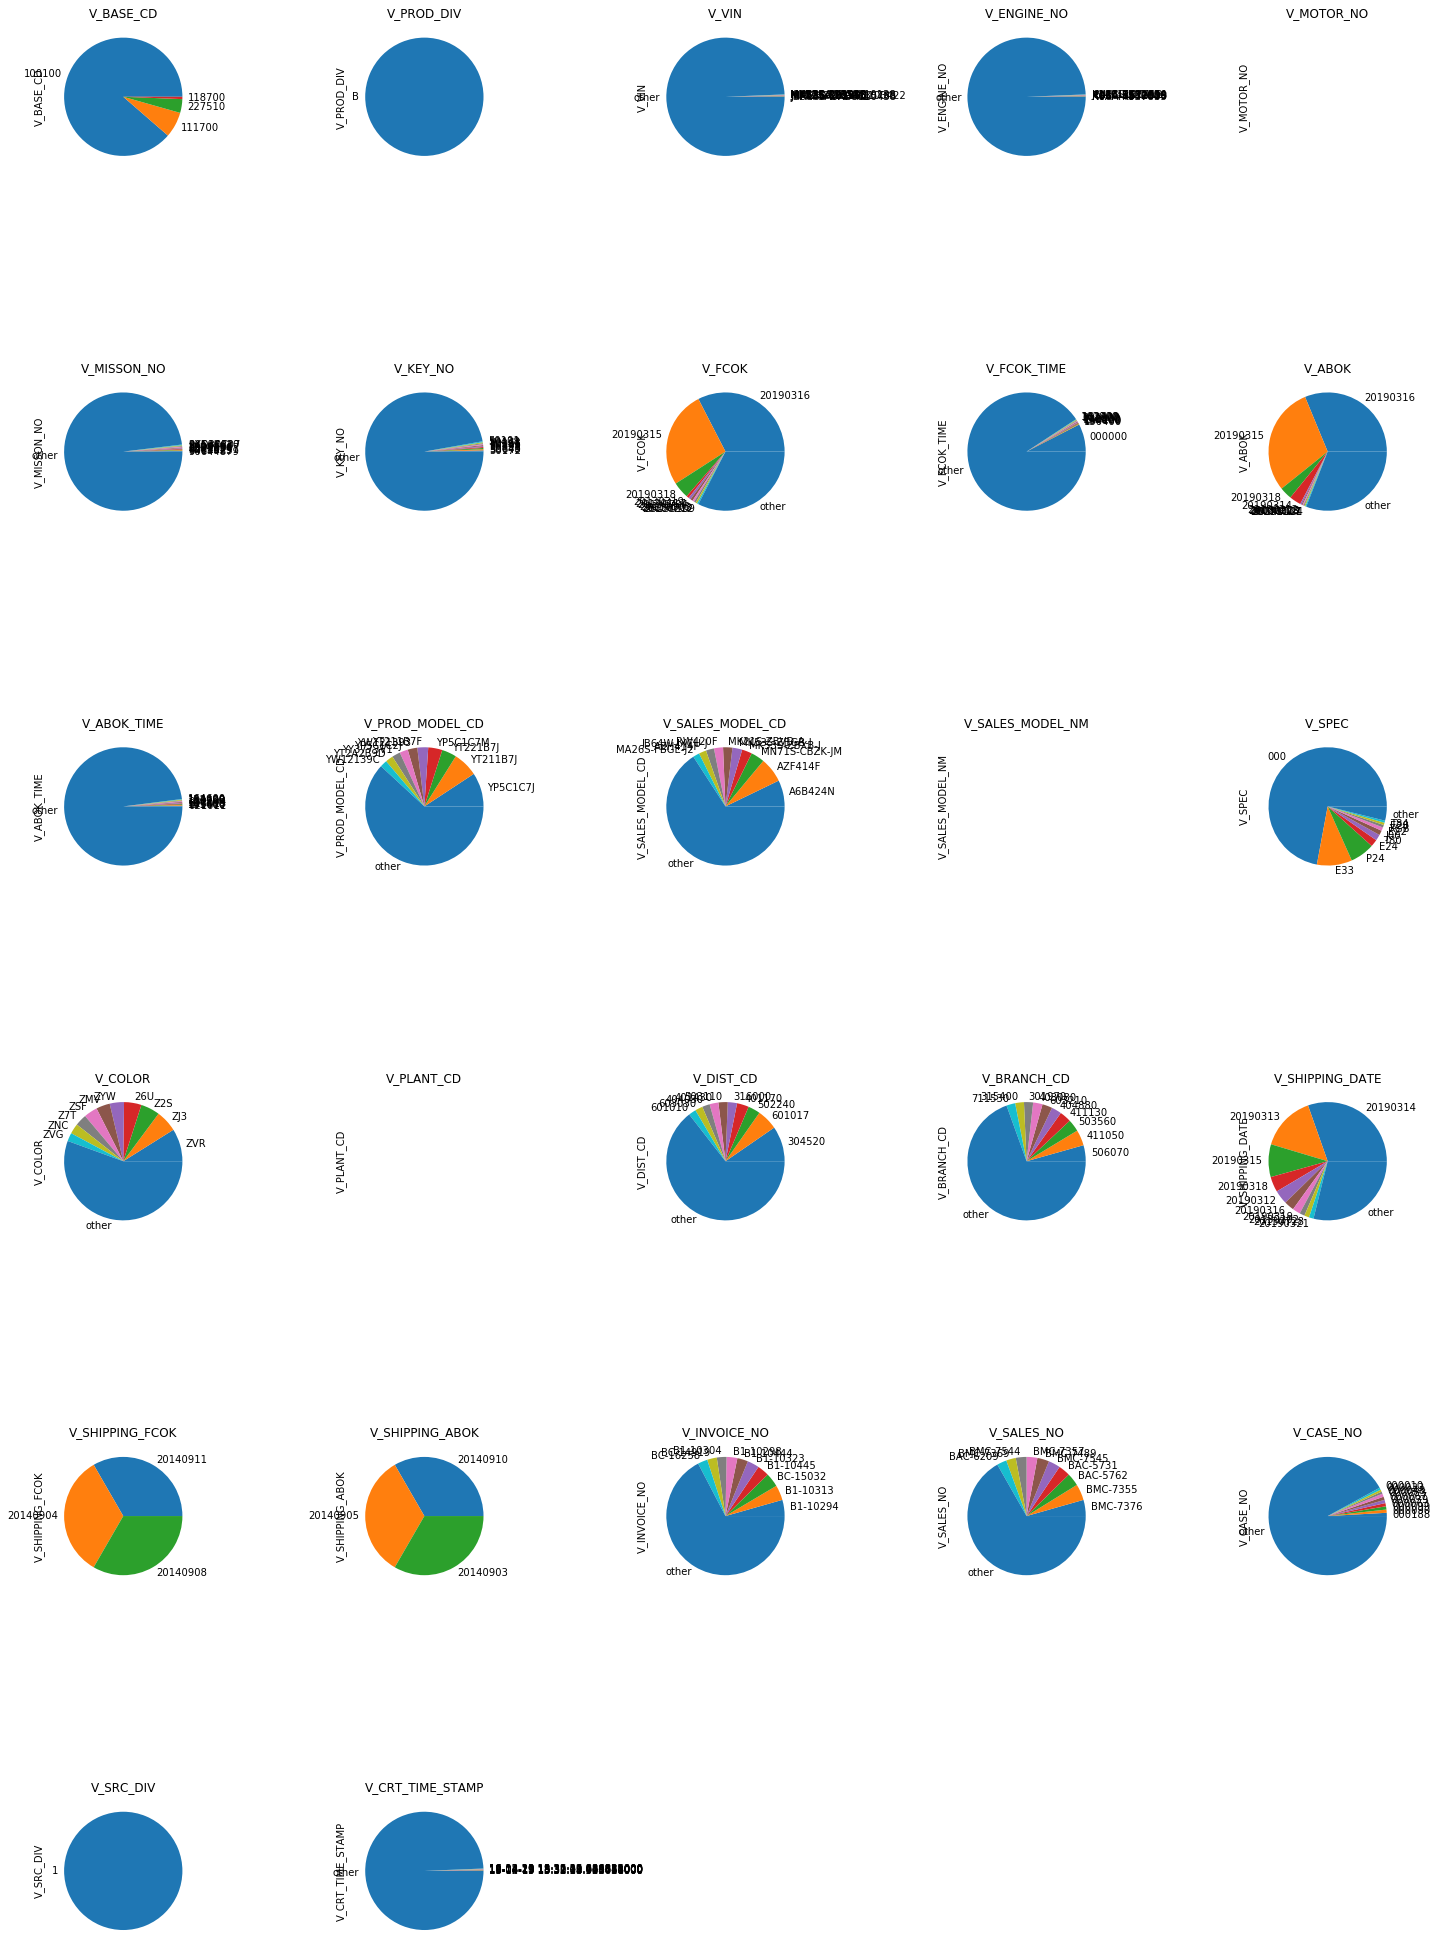

In [18]:
# 4. 名義尺度列に対して、円グラフで上位10種+その他の配分を可視化せよ

# カテゴリ値の列を探す
col_cat = [col for col in df_tbhaa.columns 
           if df_tbhaa[col].dtype.name == "object"]

plt.figure(figsize=(20,30))
n_col = len(col_cat)
for i,col in enumerate(col_cat):
    plt.subplot(n_col // 5 + 1, 5, i+1)
    vc = df_tbhaa[col].value_counts()
    vc_top = vc[:10]
    vc_other = vc[10:].sum()
    vc_top["other"] = vc_other
    vc_top.plot(kind="pie")
    plt.title(col)
plt.tight_layout()

/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


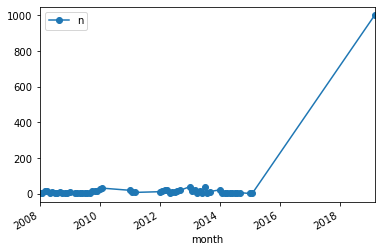

In [19]:
# 5. 月毎の件数を時系列プロットで示せ。その際に、月はV_FCOKを文字列化して最初の6桁を用いよ
df_tbhaa["month"] = pd.to_datetime(df_tbhaa["V_FCOK"].astype("object").str[:6] + "01")
df_tbhaa.groupby("month")["V_VIN"].agg({"n":len}).plot(marker="o")

(スキトラ用に準備したデータのサンプリングが適当だったので、2019年3月だけやたら多い...)

### 1.7 sqlalchemy 問題回答例

1. tbhaaテーブルから、V_PROD_DIV列のデータを取得せよ
2. tbhaaテーブルについて、V_PROD_DIV列で層別し、毎月の日本の生産件数を計算せよ。(V_FCOKの加工には、func.cast(hoge, TEXT)および func.substr(hoge, start, length)が使用できる)

In [20]:
import pathlib
from sqlalchemy import MetaData
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import sessionmaker
from sqlalchemy import TEXT, func

In [21]:
# クラスを取得
PATH_DB = pathlib.Path("skill_transfer.sqlite3")
engine = create_engine(f'sqlite:///{PATH_DB.resolve().as_posix()}')
meta = MetaData()
Base = automap_base()
Base.prepare(engine, reflect=True)

In [22]:
# 1. tbhaaテーブルから、V_PROD_DIV列のデータを取得せよ
Tbhaa = Base.classes["tbhaa"]
Session = sessionmaker(bind=engine)
s = Session()
pd.read_sql(s.query(Tbhaa.V_PROD_DIV).statement, engine)

,V_PROD_DIV
0,B
1,B
2,B
3,B
4,B
5,B
6,B
7,B
8,B
9,B


In [23]:
# 2. tbhaaテーブルについて、V_PROD_DIV列で層別し、毎月の日本の生産件数を計算せよ。
# (V_FCOKの加工には、func.cast(hoge, TEXT)および func.substr(hoge, start, length)が使用できる)
pd.read_sql(s.query(Tbhaa.V_PROD_DIV
                    ,func.substr(func.cast(Tbhaa.V_FCOK, TEXT), 1, 6).label("month")
                    ,func.count("*").label("n"))
            .group_by(Tbhaa.V_PROD_DIV
                     ,"month")
            .statement, engine)

,V_PROD_DIV,month,n
0,B,200801,3
1,B,200802,4
2,B,200803,17
3,B,200804,17
4,B,200805,4
5,B,200806,8
6,B,200807,2
7,B,200808,4
8,B,200809,8
9,B,200810,5


### 1.8 回答例

#### pandas

1. pandasのデータフレームを転置する方法について調べよ
2. pandasのSeriesをDataFrameに変更する方法について調べよ
3. {"a":1, "b":2, "c":3}というdictionaryを、アルファベット及び数字をseriesに持つDataFrameに変更せよ
4. 上記のDataFrameの各行をfor文で取得し、printせよ
5. 上記のDataFrameに対して、applyメソッドを使用して、Series(["a_1, "b_2", "c_3"])を作成せよ
6. pd.crosstabについて、pd.pivot_tableを用いて同様の結果を計算せよ

In [24]:
# 1. pandasのデータフレームを転置する方法について調べよ
# .Tで転置できる。
tmp = pd.DataFrame({"a":[1,2,3],"b":[4,5,6]})
display(tmp)
display(tmp.T)

,a,b
0,1,4
1,2,5
2,3,6


,0,1,2
a,1,2,3
b,4,5,6


In [25]:
# 2. pandasのSeriesをDataFrameに変更する方法について調べよ
# to_frame()で変更できる
series = pd.Series([1,2,3,4,5], name="test")
display(series)
display(series.to_frame())

0    1
1    2
2    3
3    4
4    5
Name: test, dtype: int64

,test
0,1
1,2
2,3
3,4
4,5


In [26]:
# 3. {"a":1, "b":2, "c":3}というdictionaryを、アルファベット及び数字をseriesに持つDataFrameに変更せよ
tmp_dict = {"a":1, "b":2, "c":3}
df_tmp = pd.DataFrame(list(tmp_dict.items()))
df_tmp

,0,1
0,a,1
1,b,2
2,c,3


In [27]:
# 4. 上記のDataFrameの各行をfor文で取得し、printせよ
for i, row in df_tmp.iterrows():
    print(row)

0    a
1    1
Name: 0, dtype: object
0    b
1    2
Name: 1, dtype: object
0    c
1    3
Name: 2, dtype: object


In [28]:
# 5. 上記のDataFrameに対して、applyメソッドを使用して、Series(["a_1, "b_2", "c_3"])を作成せよ
df_tmp.apply(lambda x: "_".join([str(v) for v in x]), axis=1)
# [str(v) for v in x]でintを文字列に直さないとエラーとなる

0    a_1
1    b_2
2    c_3
dtype: object

In [29]:
# 6. pd.crosstabについて、pd.pivot_tableを用いて同様の結果を計算せよ
pd.crosstab(df_tbhaa["V_BASE_CD"], df_tbhaa["V_SPEC"])

V_SPEC,000,E02,E22,E24,E28,E33,E37,E50,E71,E90,E96,J00,P02,P04,P12,P14,P22,P24,P96,T01,T63,T80,T84,XDE,XES,XFR,XGB,XGR,XHU,XPL,XRU,XTR
V_BASE_CD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100100,1133,1,15,31,10,151,3,1,1,4,4,0,0,0,0,0,0,0,0,1,3,26,9,0,0,0,0,0,0,0,0,0
111700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,104,0,0,0,0,0,0,0,0,0,0,0,0,0,0
118700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0
227510,0,0,0,0,0,0,0,0,0,0,0,20,3,1,0,0,7,1,0,0,0,0,0,3,5,2,11,1,1,2,1,1


In [30]:
pd.pivot_table(df_tbhaa, columns="V_SPEC",index="V_BASE_CD", aggfunc="count")\
    .fillna(0)

V_ABOK                                                         \
V_SPEC        000  E02   E22   E24   E28    E33  E37  E50  E71  E90  E96   
V_BASE_CD                                                                  
100100     1133.0  1.0  15.0  31.0  10.0  151.0  3.0  1.0  1.0  4.0  4.0   
111700        0.0  0.0   0.0   0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0   
118700        0.0  0.0   0.0   0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0   
227510        0.0  0.0   0.0   0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0   

                                                                              \
V_SPEC      J00  P02  P04  P12  P14  P22  P24  P96  T01  T63   T80  T84  XDE   
V_BASE_CD                                                                      
100100      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  3.0  26.0  9.0  0.0   
111700      0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
118700      0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
227510     20.0  2.0  1.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0   0.0  0.0  3.0   

                                                   V_ABOK_TIME             \
V_SPEC     XES  XFR   XGB  XGR  XHU  XPL  XRU  XTR         000  E02   E22   
V_BASE_CD                                                                   
100100     0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0      1133.0  1.0  15.0   
111700     0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0   0.0   
118700     0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0   0.0   
227510     5.0  2.0  11.0  1.0  1.0  2.0  1.0  1.0         0.0  0.0   0.0   

                                                                            \
V_SPEC      E24   E28    E33  E37  E50  E71  E90  E96   J00  P02  P04  P12   
V_BASE_CD                                                                    
100100     31.0  10.0  151.0  3.0  1.0  1.0  4.0  4.0   0.0  0.0  0.0  0.0   
111700      0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
118700      0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  1.0   
227510      0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0  20.0  2.0  1.0  0.0   

                                                                              \
V_SPEC     P14  P22  P24  P96  T01  T63   T80  T84  XDE  XES  XFR   XGB  XGR   
V_BASE_CD                                                                      
100100     0.0  0.0  0.0  0.0  1.0  3.0  26.0  9.0  0.0  0.0  0.0   0.0  0.0   
111700     5.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   
118700     0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   
227510     0.0  3.0  0.0  0.0  0.0  0.0   0.0  0.0  3.0  5.0  2.0  11.0  1.0   

                              V_BRANCH_CD                                     \
V_SPEC     XHU  XPL  XRU  XTR         000  E02  E22  E24  E28  E33  E37  E50   
V_BASE_CD                                                                      
100100     0.0  0.0  0.0  0.0      1129.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
111700     0.0  0.0  0.0  0.0         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
118700     0.0  0.0  0.0  0.0         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
227510     1.0  2.0  1.0  1.0         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                                                            \
V_SPEC     E71  E90  E96  J00  P02  P04  P12  P14  P22  P24  P96  T01  T63   
V_BASE_CD                                                                    
100100     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  2.0   
111700     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
118700     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
227510     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                                                  V_CASE_NO  \
V_SPEC      T80  T84  XDE  XES  XFR  XGB  XGR  XHU  XPL  XRU  XTR       000   
V_B

#### SQL

1. スピアマンの順位相関について調べよ。スピアマンの順位相関を、SQLを用いて実装せよ。WITH句を使用すると書きやすい。
2. WINDOW関数を利用して、dbhaaテーブルを処理月およびW_KEYでソートし、過去10件のW_TOTAL_AMTの移動平均を計算せよ
3. 2のSQLについて、パラメータを変更できるように、列名(デフォルト値W_TOTAL_AMT)とwindow幅(デフォルト値10)を引数にもち、SQLを発行する関数sql_smaを作成せよ

1 スピアマンの順位相関は、順位で計算した相関係数。  
通常の相関係数(ピアソンの積率相関係数と呼ばれる)と異なり、ノンパラメトリックな指標である。すなわち、各サンプルの順位関係さえ変化しなければ、たとえどのような分布をしていようと、スピアマンの相関係数は変化しない。
[こちら](https://ja.wikipedia.org/wiki/スピアマンの順位相関係数)を参照。  
式は以下の通り。
$$\rho =1-{\frac  {6\sum D^{2}}{N^{3}-N}}$$
で定義される。ただし  
$D$ = 対応する$X$ と$Y$ の値の順位の差  
$N$ = 値のペアの数(レコード数)
である。  
分布を仮定しないため、眞田は相関係数といえばこの値を用いる事が多い。

In [31]:
call_query("select * from dbhaa")

,W_KEY,W_BASE_CD,W_PROD_BASE_CD,W_FIELD_CLAIM_DIV,W_PROD_DIV,W_DMEX_DIV,W_PROCESS_MONTH,W_DIST_CD,W_DIST_COUNTRY_CD,W_DIST_ISSUE_NO,W_SHOP_DIV,W_SHOP_CD,W_DIV1,W_DIV2,W_DIV3,W_FIXED_DIV,W_MINUS_DIV,W_SRC_DIV,W_SRC_KEY,W_VIN,W_FCOK,W_PROD_MODEL_CD,W_SALES_DATE,W_FAILURE_DATE,W_MILEAGE_DIV,W_MILEAGE,W_CAUSAL_PART_NO,W_TROUBLE_CC,W_TROUBLE_CP,W_TROUBLE_DF,W_TROUBLE_MP,W_DTC_1,W_DTC_2,W_OPERATION_CD,W_PARTS_AMT,W_LABOR_HOUR,W_LABOR_AMT,W_SUBLET_HOUR,W_SUBLET_AMT,W_SHIPPING_AMT,W_TOTAL_AMT,W_CFC_COMPANY_CD,W_CFC_RATE,W_CFC_AMT,W_FC_TO_FAILURE,W_SALES_TO_FAILURE,W_SB_NO,W_CRT_TIME_STAMP
0,WRJPJP201504B001202,100100,100100,1,B,0,201504,40223,JP,15C0100551,1,015,1,0,None,1,1,1,201504006777793,MH34S-702672,20120901,YV0E1B9J,20120928,20150323,K,16283,72350-72M02,99,76,24,9,None,None,None,910.0,0.2,1240.0,0.0,0.0,0.0,2150.0,3116,30,514.0,30,30,None,17-06-19 18:05:50.068344000
1,WRJPJP201504B001203,100100,100100,1,B,0,201504,40223,JP,15C0105891,1,015,1,0,None,1,1,1,201504006776105,MH34S-718306,20130101,YV0E1B9J,20130214,20150324,K,10433,72350-72M02,99,65,24,1,None,None,None,910.0,0.2,1240.0,0.0,0.0,0.0,2150.0,3116,30,514.0,26,26,None,17-06-19 18:05:50.071115000
2,WRJPJP201504B001204,100100,100100,1,B,0,201504,50224,JP,15D0054801,1,022,4,0,None,1,1,1,201504006791151,MH23S-837237,20100101,YG0B1B9D,20100129,20150413,K,43200,17931-58J01,99,85,29,4,None,None,None,878.0,0.2,1280.0,0.0,0.0,0.0,2158.0,3978,0,0.0,63,63,None,17-06-19 18:05:50.073222000
3,WRJPJP201504B001205,100100,100100,1,B,0,201504,50224,JP,15C0085531,1,078,1,0,None,1,1,1,201504006770379,MH23S-668540,20120401,YG0A2B9D,20120420,20150327,K,21877,17931-58J01,32,85,23,8,None,None,None,878.0,0.2,1280.0,0.0,0.0,0.0,2158.0,3978,50,783.0,35,36,None,17-06-19 18:05:50.075672000
4,WRJPJP201504B001206,100100,100100,1,B,0,201504,50224,JP,15C0057741,1,006,4,0,None,1,1,1,201504006772241,MK21S-197951,20100401,YT212B9F,20100409,20150313,K,32461,17931-58J01,99,85,29,8,None,None,None,878.0,0.2,1280.0,0.0,0.0,0.0,2158.0,3978,0,0.0,59,60,None,17-06-19 18:05:50.077429000
5,WRJPJP201504B001207,100100,100100,1,B,0,201504,31601,JP,15C0076391,1,019,1,0,None,1,1,1,201504006771864,MH34S-294467,20140201,YV052B98,20140328,20150322,K,2280,38340-50M00,13,37,21,8,None,None,None,1520.0,0.1,640.0,0.0,0.0,0.0,2160.0,3198,0,0.0,13,12,None,17-06-19 18:05:50.080591000
6,WRJPJP201504B001208,100100,100100,1,B,0,201504,40403,JP,15C0055621,3,051,1,0,None,1,1,1,201504006762770,MA15S-145223,20120301,YK811CVE,20120319,20150316,K,15800,43252-63J10-0PG,99,76,14,9,None,None,None,2160.0,0.0,0.0,0.0,0.0,0.0,2160.0,3371,50,330.0,36,36,None,17-06-19 18:05:50.082147000
7,WRJPJP201504B001209,100100,100100,1,B,0,201504,50301,JP,0000141869,1,None,1,0,None,1,1,1,201504002989850,MH34S-158784,20130101,YV051BVJ,20130129,20150322,K,15014,14281-68K00,42,84,35,9,None,None,None,923.0,0.2,1240.0,0.0,0.0,0.0,2163.0,3416,50,807.0,26,26,None,17-06-19 18:05:50.084484000
8,WRJPJP201504B001210,100100,100100,1,B,0,201504,51609,JP,15C0001851,1,001,9,0,None,1,1,1,201504006790274,DA17W-101098,20150201,YV7A1H79,20150323,20150319,K,257,28150-64P30-ZML,99,63,24,3,None,None,None,1567.0,0.1,600.0,0.0,0.0,0.0,2167.0,3302,0,0.0,1,0,None,17-06-19 18:05:50.086151000
9,WRJPJP201504B001211,100100,100100,1,B,0,201504,30903,JP,15C0086341,1,010,1,0,None,1,1,1,201504006771784,DA63T-836513,20130601,YH626BCC,20130717,20150330,K,12728,36260-67H02,13,85,15,2,None,None,None,968.0,0.2,1200.0,0.0,0.0,0.0,2168.0,3119,38,620.0,21,21,None,17-06-19 18:05:50.089008000


In [32]:
# 1. スピアマンの順位相関について調べよ。スピアマンの順位相関を、SQLを用いて実装せよ。WITH句を使用すると書きやすい。
def spearman_sql(col1, col2, table):
    sql = """
            with ranktable as (
                select 
                    rank() over(order by {col1} desc) as rank1
                    ,rank() over(order by {col2} desc) as rank2
                from 
                    {table}
            ), difftable as (
                select 
                    rank1 - rank2 as diff
                from 
                    ranktable
            ), calc as (
            select 
                avg(diff * diff) as D_SQ_AVG
                ,count(*) as N
            from 
                difftable
            )
            select 
                1 - 6 * D_SQ_AVG / (N * N - 1) as rho
            from
                calc;
            """.format(col1=col1, col2=col2, table=table)
    return call_query(sql)

In [33]:
spearman_sql("W_TOTAL_AMT","W_LABOR_AMT", "dbhaa")

,rho
0,0.632376


In [34]:
df_dbhaa = call_query("select * from dbhaa")
df_dbhaa["W_TOTAL_AMT"].corr(df_dbhaa["W_LABOR_AMT"], method="spearman")
# SQLの方は順位タイの扱いが適当なので、若干値が異なる

0.6257411057230525

In [35]:
df_dbhaa.head()

,W_KEY,W_BASE_CD,W_PROD_BASE_CD,W_FIELD_CLAIM_DIV,W_PROD_DIV,W_DMEX_DIV,W_PROCESS_MONTH,W_DIST_CD,W_DIST_COUNTRY_CD,W_DIST_ISSUE_NO,W_SHOP_DIV,W_SHOP_CD,W_DIV1,W_DIV2,W_DIV3,W_FIXED_DIV,W_MINUS_DIV,W_SRC_DIV,W_SRC_KEY,W_VIN,W_FCOK,W_PROD_MODEL_CD,W_SALES_DATE,W_FAILURE_DATE,W_MILEAGE_DIV,W_MILEAGE,W_CAUSAL_PART_NO,W_TROUBLE_CC,W_TROUBLE_CP,W_TROUBLE_DF,W_TROUBLE_MP,W_DTC_1,W_DTC_2,W_OPERATION_CD,W_PARTS_AMT,W_LABOR_HOUR,W_LABOR_AMT,W_SUBLET_HOUR,W_SUBLET_AMT,W_SHIPPING_AMT,W_TOTAL_AMT,W_CFC_COMPANY_CD,W_CFC_RATE,W_CFC_AMT,W_FC_TO_FAILURE,W_SALES_TO_FAILURE,W_SB_NO,W_CRT_TIME_STAMP
0,WRJPJP201504B001202,100100,100100,1,B,0,201504,40223,JP,15C0100551,1,015,1,0,None,1,1,1,201504006777793,MH34S-702672,20120901,YV0E1B9J,20120928,20150323,K,16283,72350-72M02,99,76,24,9,None,None,None,910.0,0.2,1240.0,0.0,0.0,0.0,2150.0,3116,30,514.0,30,30,None,17-06-19 18:05:50.068344000
1,WRJPJP201504B001203,100100,100100,1,B,0,201504,40223,JP,15C0105891,1,015,1,0,None,1,1,1,201504006776105,MH34S-718306,20130101,YV0E1B9J,20130214,20150324,K,10433,72350-72M02,99,65,24,1,None,None,None,910.0,0.2,1240.0,0.0,0.0,0.0,2150.0,3116,30,514.0,26,26,None,17-06-19 18:05:50.071115000
2,WRJPJP201504B001204,100100,100100,1,B,0,201504,50224,JP,15D0054801,1,022,4,0,None,1,1,1,201504006791151,MH23S-837237,20100101,YG0B1B9D,20100129,20150413,K,43200,17931-58J01,99,85,29,4,None,None,None,878.0,0.2,1280.0,0.0,0.0,0.0,2158.0,3978,0,0.0,63,63,None,17-06-19 18:05:50.073222000
3,WRJPJP201504B001205,100100,100100,1,B,0,201504,50224,JP,15C0085531,1,078,1,0,None,1,1,1,201504006770379,MH23S-668540,20120401,YG0A2B9D,20120420,20150327,K,21877,17931-58J01,32,85,23,8,None,None,None,878.0,0.2,1280.0,0.0,0.0,0.0,2158.0,3978,50,783.0,35,36,None,17-06-19 18:05:50.075672000
4,WRJPJP201504B001206,100100,100100,1,B,0,201504,50224,JP,15C0057741,1,006,4,0,None,1,1,1,201504006772241,MK21S-197951,20100401,YT212B9F,20100409,20150313,K,32461,17931-58J01,99,85,29,8,None,None,None,878.0,0.2,1280.0,0.0,0.0,0.0,2158.0,3978,0,0.0,59,60,None,17-06-19 18:05:50.077429000


In [36]:
# 2. WINDOW関数を利用して、dbhaaテーブルを処理月およびW_KEYでソートし、過去10件のW_TOTAL_AMTの移動平均を計算せよ
sql = """
    with dummy as (
        select
            (W_PROCESS_MONTH || W_KEY) as sorter
            ,W_TOTAL_AMT
            ,W_KEY
            ,W_PROCESS_MONTH
        from
            dbhaa
        )
    select 
        W_PROCESS_MONTH
        ,W_KEY
        ,W_TOTAL_AMT
        ,avg(W_TOTAL_AMT) 
            over(order by sorter rows between 9 preceding and current row) as MA10
    from
        dummy;
"""
call_query(sql)

,W_PROCESS_MONTH,W_KEY,W_TOTAL_AMT,MA10
0,201503,WRATJP201503B000229,17900.0,17900.000000
1,201503,WRATJP201503B000230,17908.0,17904.000000
2,201503,WRAUJP201503B000587,13454.0,16420.666667
3,201503,WRAUJP201503B000588,13454.0,15679.000000
4,201503,WRAUJP201503B000589,13454.0,15234.000000
5,201503,WRAUJP201503B000590,13454.0,14937.333333
6,201503,WRAUJP201503B000591,13454.0,14725.428571
7,201503,WRAUJP201503B000592,13454.0,14566.500000
8,201503,WRAUJP201503B000593,13454.0,14442.888889
9,201503,WRAUJP201503B000594,13454.0,14344.000000


In [37]:
df_dbhaa.sort_values(by=["W_PROCESS_MONTH","W_KEY"])["W_TOTAL_AMT"].rolling(window=10, min_periods=1).mean()

811    17900.000000
812    17904.000000
387    16420.666667
388    15679.000000
389    15234.000000
390    14937.333333
391    14725.428571
392    14566.500000
393    14442.888889
394    14344.000000
395    13899.400000
396    13454.000000
397    13454.000000
398    13454.000000
399    13454.000000
400    13454.000000
401    13454.000000
402    13454.000000
403    13454.000000
404    13454.000000
405    13454.000000
406    13454.000000
407    13454.000000
408    13454.000000
409    13454.000000
410    13454.000000
411    13454.000000
412    13454.000000
413    13454.000000
414    13454.000000
           ...     
270     3000.000000
271     3000.000000
272     3000.000000
273     3000.000000
274     3000.000000
275     3000.000000
276     3000.000000
277     3000.000000
278     3000.000000
279     3000.000000
280     3000.000000
281     3000.000000
282     3000.000000
283     3000.000000
284     3000.000000
285     3000.000000
286     3000.000000
287     3000.000000
288     3000.000000


In [38]:
# 3. 2のSQLについて、パラメータを変更できるように、列名(デフォルト値W_TOTAL_AMT)とwindow幅(デフォルト値10)を引数にもち、
# SQLを発行する関数sql_smaを作成せよ
def sql_sma(col="W_TOTAL_AMT", window=10):
    sql = """
    with dummy as (
        select
            (W_PROCESS_MONTH || W_KEY) as sorter
            ,{col}
            ,W_KEY
            ,W_PROCESS_MONTH
        from
            dbhaa
        )
    select 
        W_PROCESS_MONTH
        ,W_KEY
        ,{col}
        ,avg({col}) 
            over(order by sorter rows between {window_m1} preceding and current row) as MA{window}
    from
        dummy;
    """.format(col=col, window=window, window_m1=window-1)
    return call_query(sql)

In [39]:
sql_sma(col="W_LABOR_AMT", window=20)

,W_PROCESS_MONTH,W_KEY,W_LABOR_AMT,MA20
0,201503,WRATJP201503B000229,7876.0,7876.000000
1,201503,WRATJP201503B000230,12798.0,10337.000000
2,201503,WRAUJP201503B000587,12701.0,11125.000000
3,201503,WRAUJP201503B000588,12701.0,11519.000000
4,201503,WRAUJP201503B000589,12701.0,11755.400000
5,201503,WRAUJP201503B000590,12701.0,11913.000000
6,201503,WRAUJP201503B000591,12701.0,12025.571429
7,201503,WRAUJP201503B000592,12701.0,12110.000000
8,201503,WRAUJP201503B000593,12701.0,12175.666667
9,201503,WRAUJP201503B000594,12701.0,12228.200000


#### SQLalchemy

(実行するか否かは別にして)dbhaaテーブルに対し、何らかのカテゴリ変数1種で層別し、毎月のワランティ件数を計算するためのSQLを全て発行せよ。(for文を用いよ)

In [40]:
Dbhaa = Base.classes["dbhaa"]

In [41]:
Dbhaa.__table__.columns["W_KEY"].type

TEXT()

In [42]:
s = Session()

In [43]:
col_cat = [(key,col) for key, col in Dbhaa.__table__.columns.items() if isinstance(col.type, TEXT)]
sql_dict = {}
for key, col in col_cat:
    sql_dict[key] = str(s.query(Dbhaa.W_PROCESS_MONTH, col, func.count("*"))\
                        .group_by(col, Dbhaa.W_PROCESS_MONTH)\
                        .statement.compile(compile_kwargs={"literal_binds": True}))

In [44]:
sql_dict["W_KEY"]

'SELECT dbhaa."W_PROCESS_MONTH", dbhaa."W_KEY", count(\'*\') AS count_1 \nFROM dbhaa GROUP BY dbhaa."W_KEY", dbhaa."W_PROCESS_MONTH"'